# Analisis causal churn

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

from causalnex.structure import StructureModel
from causalnex.plots import plot_structure
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork

### preparacion de la data

In [2]:
data=pd.read_csv('data/churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...        Contract  \
0  No phone service             DSL             No  ...  Month-to-month   
1                No             DSL            Yes  ...        One year   
2                No             DSL            Yes  ...  Month-to-month   
3  No phone service             DSL            Yes  ...        One year   
4                No     Fiber optic             No  ...  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.85        29.85   
1               No               Mailed check          56.95      1889.50   
2              Yes               Mailed check          53.85       108.15   
3               No  Bank transfer (automatic)          42.30      1840.75   
4              Yes           Electronic check          70.70       151.65   

  Churn MonthLevel TotalLevel  TenureLevel  ChurnBinary  
0    No        Low   Very Low          New          0.0  
1    No        Low   Moderate        Loyal          0.0  
2   Yes        Low   Very Low          New          1.0  
3    No        Low   Moderate        Loyal          0.0  
4   Yes   Moderate   Very Low          New          1.0  

[5 rows x 25 columns]

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthLevel', 'TotalLevel', 'TenureLevel', 'ChurnBinary'],
      dtype='object')

In [ ]:
data.info()

In [ ]:
def one_hot(df, columns, drop_first=True): 
    dummy=pd.get_dummies(df, 
                         columns=columns, 
                         drop_first=drop_first)
    return dummy

In [ ]:
data=data.drop(columns=['customerID', 'Churn'])

In [ ]:
data=one_hot(data, ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthLevel', 'TotalLevel', 
                    'TenureLevel', 'InternetService', 'gender'])

In [ ]:
data.head()

In [ ]:
data.info()

### red bayesiana

In [4]:
sm=StructureModel()
sm

In [5]:
sm=from_pandas(data._get_numeric_data())

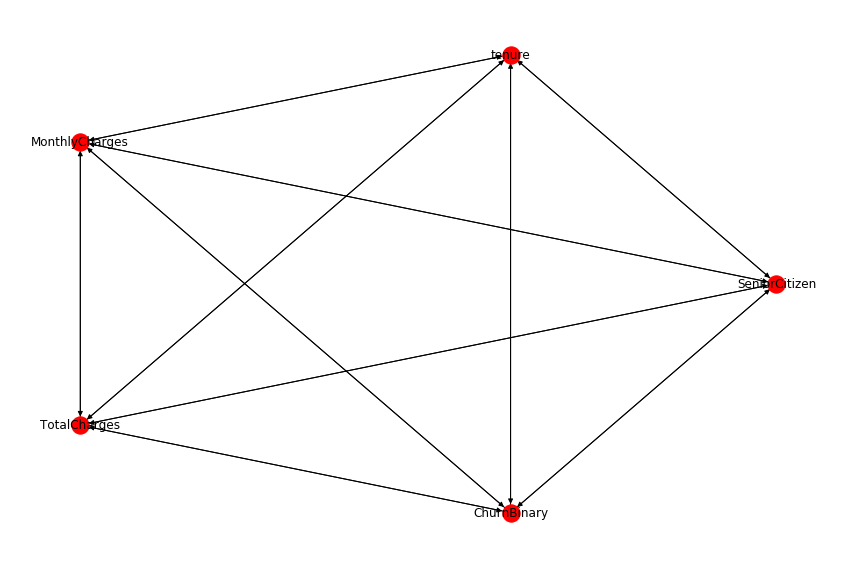

In [6]:
plt.rcParams['figure.figsize']=(12.0, 8.0)

fig, ax, nodes=plot_structure(sm);

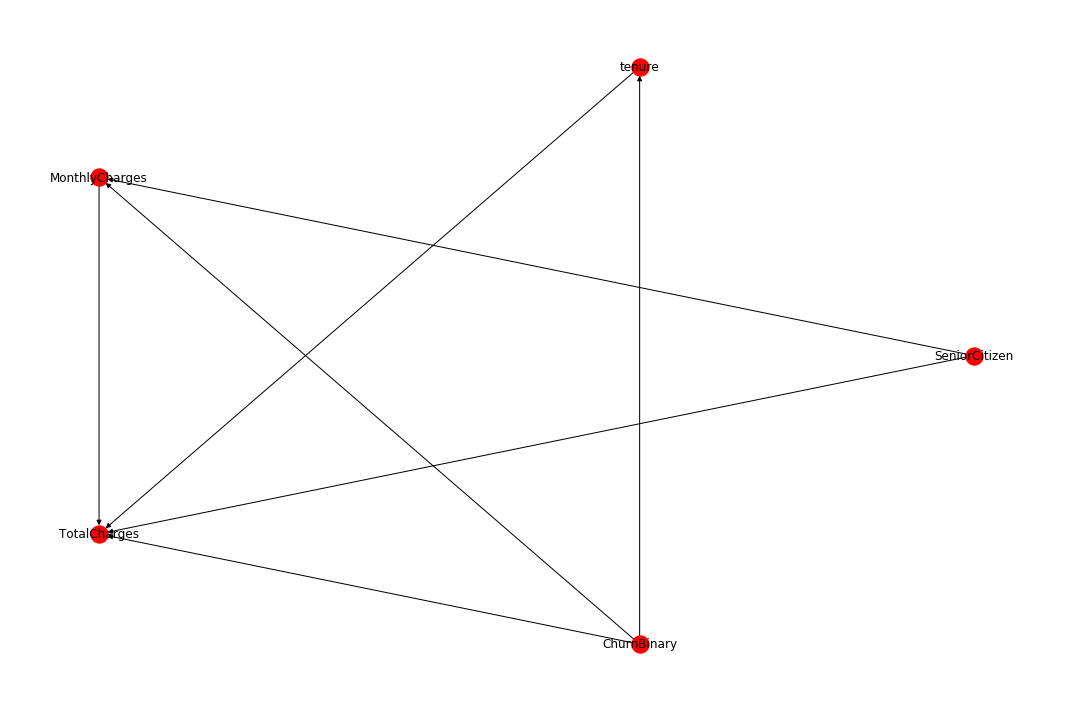

In [7]:
plt.rcParams['figure.figsize']=(15.0, 10.0)



sm.remove_edges_below_threshold(0.99)

fig, ax, nodes=plot_structure(sm);

In [8]:
bn=BayesianNetwork(sm)
bn

In [9]:
bn=bn.fit_node_states(data._get_numeric_data())

In [ ]:
bn=bn.fit_cpds(data._get_numeric_data(), method='BayesianEstimator', bayes_prior='K2')

In [ ]:
bn.cpds['tenure']